# Narrative analytics and experimentation

### Author:Nutan Mandale

### Mentor:Vincent Ramdhanie

### Data Description

In 2012, the Massachusetts Institute of Technology (MIT) and Harvard University launched open online courses on edX, a non-profit learning platform co-founded by the two institutions.The dataset contains data on 290 Harvard and MIT online courses, 250 thousand certifications, 4.5 million participants, and 28 million participant hours on the edX platform since 2012.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
#import csv
appendix = pd.read_csv("./appendix.csv")
df = pd.DataFrame(appendix)

Regarding this data set we have an assumption that men are more inclined to the science and technology while women are more interested in social science and governance. With this dataset let us find out if our assumption is correct or not.
Let us analyse the courses tought by the two institutes.

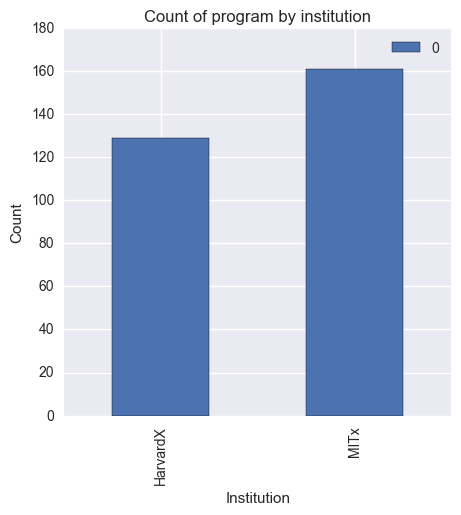

In [3]:
appendix.groupby(['Institution'], as_index = False).mean()
ax = appendix.groupby("Institution").size().to_frame().plot(kind='bar',figsize=(5,5))
ax.set_ylabel("Count")
ax.set_xlabel("Institution")
ax.set_title("Count of program by institution");

MITx have more programs than that of Harvard.

In [4]:
#Rename the participants column
df = df.rename(columns={'Participants (Course Content Accessed)':'Participants'})
df = df.rename(columns={'Audited (> 50% Course Content Accessed':'Audited'})

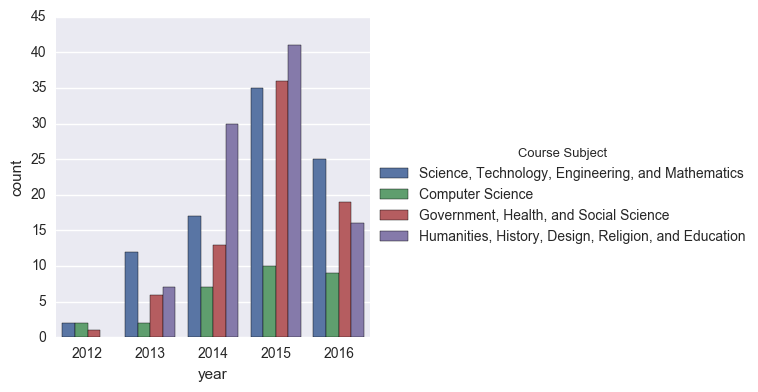

In [5]:
appendix['year'] = pd.to_datetime(appendix['Launch Date']).dt.year
sns.factorplot('year',data=appendix,hue='Course Subject',kind='count');

With this graph we can see that in 2015 highest number of courses were released on all the topics. AMong all the subjects courses on Humanities,History,Religion and Education were maximum.

Now let us see both the institutions seperately.

In [6]:
MIT_df = appendix[appendix.Institution == 'MITx']
harvard_df = appendix[appendix.Institution == 'HarvardX']

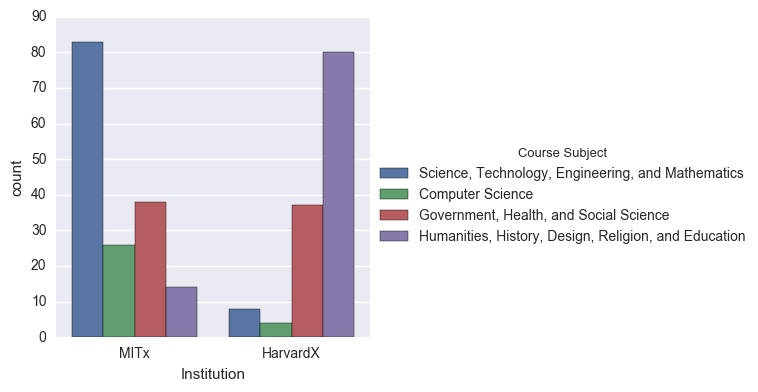

In [7]:
sns.factorplot('Institution',data=appendix,hue='Course Subject',kind='count');

It is clear MITx have more courses on Science ,Technology,Engineering and Mathematics while HarvardX have more courses on Humanities,History,Design,Religion and Education

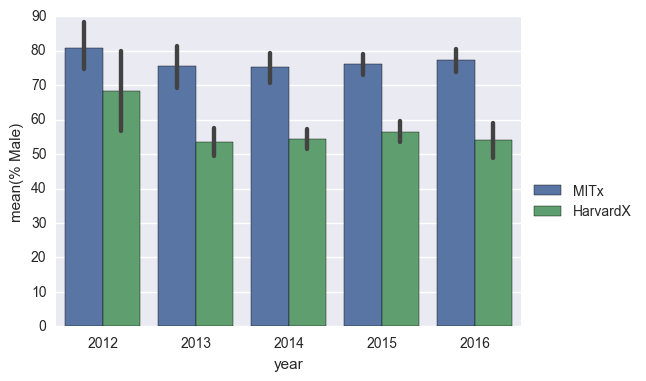

In [8]:
sns.barplot(x='year', y='% Male', hue="Institution", data=appendix)
sns.plt.legend(loc='upper left',bbox_to_anchor=(1,0.5));

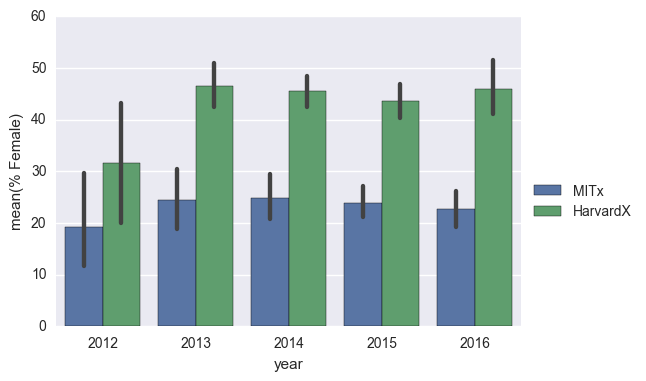

In [9]:
sns.barplot(x='year', y='% Female', hue="Institution", data=appendix)
sns.plt.legend(loc='upper left',bbox_to_anchor=(1,0.5));

If we see the above 2 plots Harvard seems to be more popular among female while MIT is popular among male participants.

Now let us breakdown according to course subject 

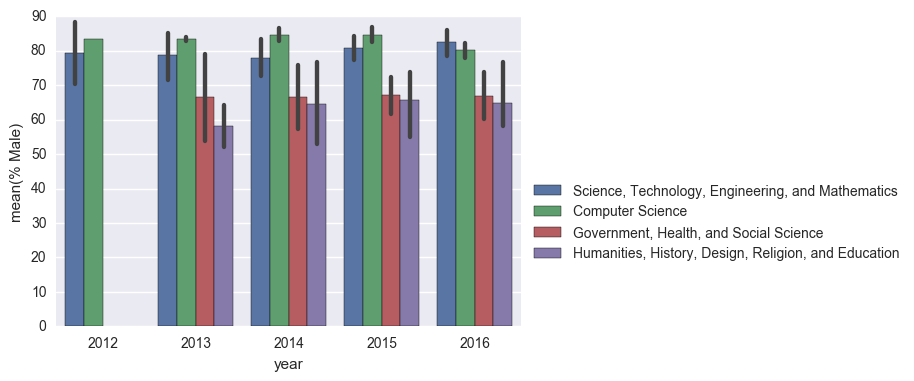

In [10]:
sns.barplot(x='year', y='% Male', hue='Course Subject', data= MIT_df)
sns.plt.legend(loc='upper left',bbox_to_anchor=(1,0.5));

We see over the years Sceince ,Technology ,Engineering and Mathematics and Computer Science these 2 course subjects are consistently popular among male participants.

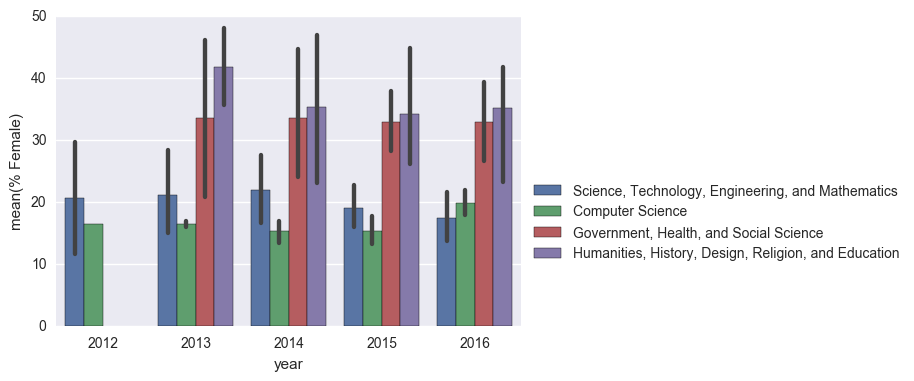

In [11]:
sns.barplot(x='year', y='% Female', hue='Course Subject', data= MIT_df)
sns.plt.legend(loc='upper left',bbox_to_anchor=(1,0.5));

From this graph we find more female participants taking the course on Humanities,History and Social Science as well as Governemnt,Health and Social Science.

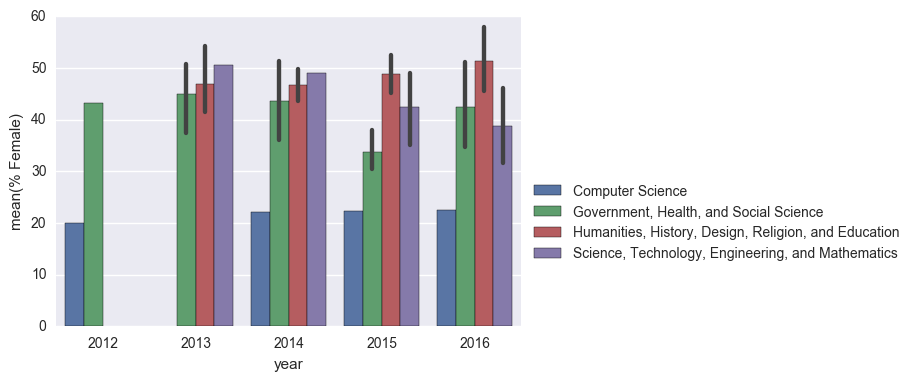

In [12]:
sns.barplot(x='year', y='% Female', hue='Course Subject', data= harvard_df)
sns.plt.legend(loc='upper left',bbox_to_anchor=(1,0.5));

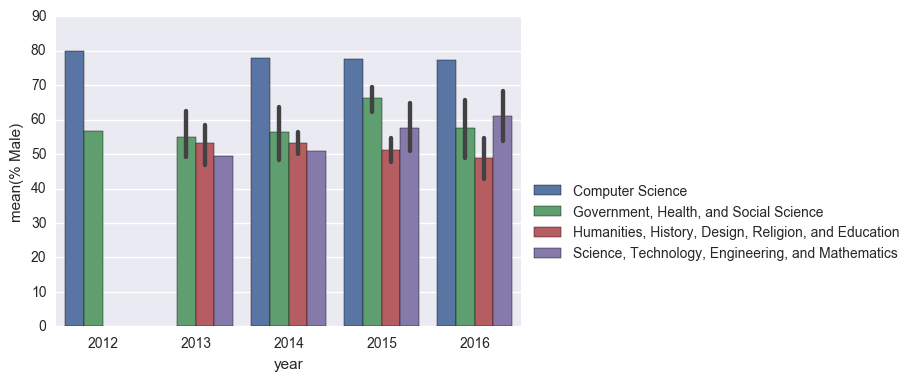

In [13]:
sns.barplot(x='year', y='% Male', hue='Course Subject', data= harvard_df)
sns.plt.legend(loc='upper left',bbox_to_anchor=(1,0.5));

With the above plots it is very clear that we see more men taking courses on scinece,Technology and computer science while women choose Humanities,History,Design,Religion and Education.

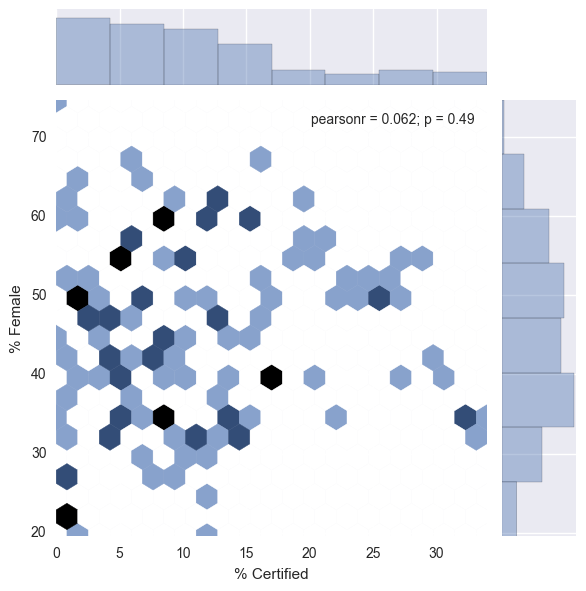

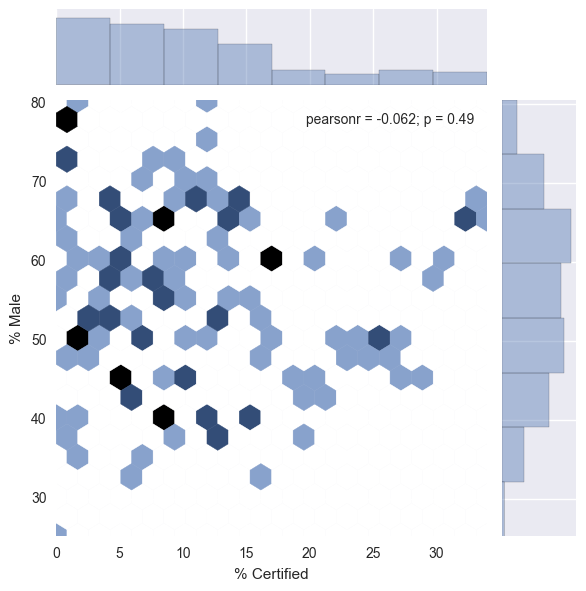

In [14]:
sns.jointplot(x='% Certified', y='% Female', kind = 'hex',gridsize=20, data= harvard_df)
sns.jointplot(x='% Certified', y='% Male',  kind = 'hex',gridsize=20,data= harvard_df);

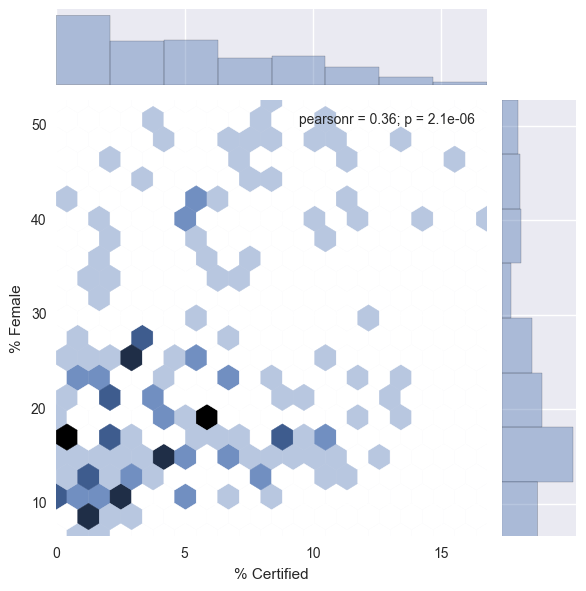

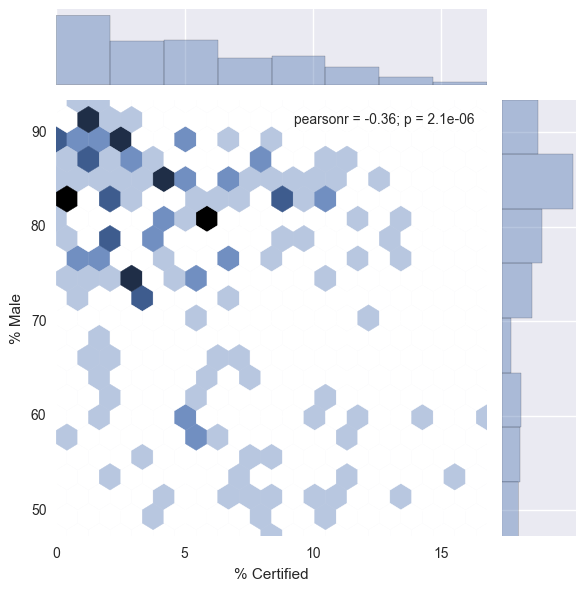

In [15]:
sns.jointplot(x='% Certified', y='% Female', kind = 'hex',gridsize=20, data= MIT_df)
sns.jointplot(x='% Certified', y='% Male', kind = 'hex',gridsize=20, data= MIT_df);

Now let us compare the median age of female and male participants different institutes.

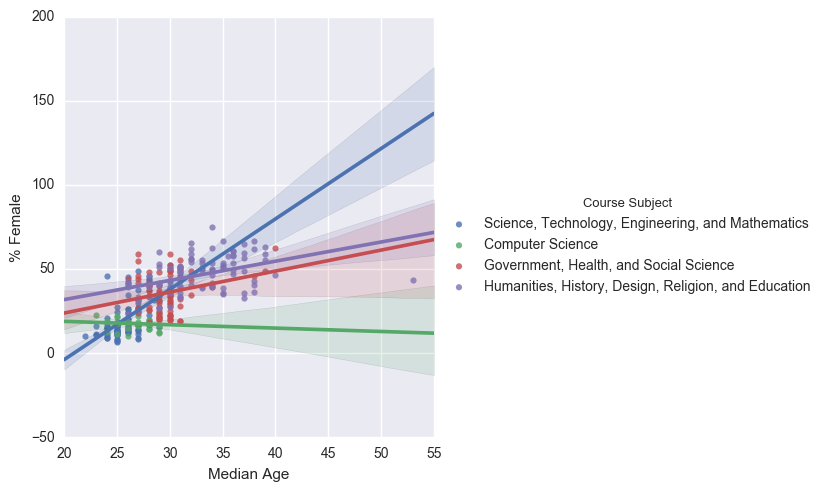

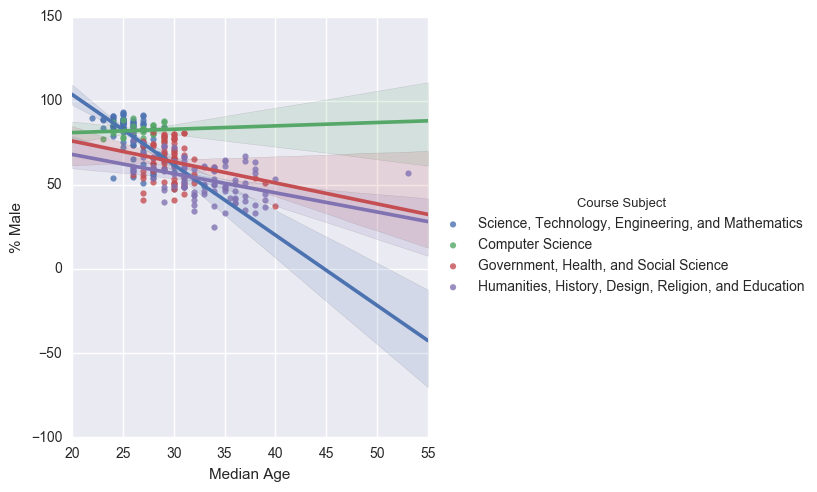

In [16]:
g = sns.lmplot(y='% Female', 
               x='Median Age',
               hue = 'Course Subject',
               data=appendix, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               )
g = sns.lmplot(y='% Male', 
               x='Median Age',
               hue = 'Course Subject',
               data=appendix, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               )

With this plot we can find some interesting conclusions. Older female are participating more in all subjects except computers while we find opposite in male.


In [17]:
dfmax = appendix[appendix['% Certified'] == appendix.groupby(['Course Subject'])['% Certified'].transform(max)]

In [18]:
dfmax.head()

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher,year
98,HarvardX,SW12.9x,11/20/2014,Communist Liberations,"Peter Bol, Bill Kirby","Humanities, History, Design, Religion, and Edu...",3,1,4248,1835,...,79.76,30.14,50.49,23.03,9.76,37.0,67.11,32.89,82.98,2014
193,HarvardX,SPU30x,10/13/2015,Super-Earths and Life,Dimitar Sasselov,"Science, Technology, Engineering, and Mathematics",4,1,29176,11250,...,51.96,26.62,52.35,109.00,13.47,26.0,60.09,39.91,44.95,2015
197,MITx,6.00.2x,10/20/2015,Introduction to Computational Thinking and Dat...,"Eric Grimson, John Guttag, Ana Bell",Computer Science,4,1,12426,2338,...,70.46,7.48,31.47,167.80,69.53,28.0,85.39,14.61,74.43,2015
218,HarvardX,PH557x,12/03/2015,Lessons from Ebola: Preventing the Next Pandemic,Ashish Jha,"Government, Health, and Social Science",4,1,3072,1479,...,70.54,14.71,39.62,14.21,12.82,27.0,45.49,54.51,70.64,2015
